In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Functions import *
from DataDefined import *


df = pd.read_csv('Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv')

In [3]:
palette = sns.color_palette("tab10", n_colors=df["Class"].nunique())
reversed_palette = palette[::-1]
reversed_palette

[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

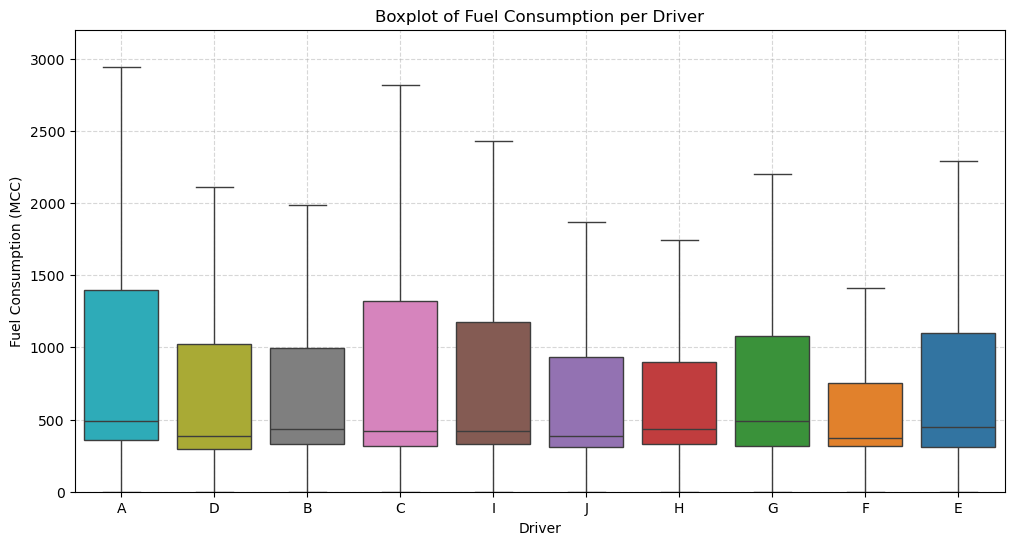

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Class", y="Fuel_consumption", data=df, hue="Class", palette=reversed_palette, showfliers=False, legend=False)

plt.xlabel("Driver")
plt.ylabel("Fuel Consumption (MCC)")
plt.title("Boxplot of Fuel Consumption per Driver")
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(0,3200)
plt.show()


In [9]:
df=addRideNumbers(df)
df

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder,Ride number
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,...,1,325.5,0.0,-8.8,0,-3.4,1,A,1,0
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,...,1,0.9,0.0,-0.2,0,-3.6,2,A,1,0
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,...,1,0.9,0.0,-0.2,0,-3.6,3,A,1,0
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,...,1,0.9,0.0,-0.2,0,-3.6,4,A,1,0
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,...,1,0.9,0.0,-0.2,0,-3.5,5,A,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94375,332.8,0.0,6.1,-2.3,55,0,14.1,3,0,0,...,2,10.2,14.5,-0.1,16,2.9,1940,E,2,3
94376,320.0,0.0,6.6,-0.8,56,0,14.5,3,0,0,...,2,16.7,0.0,-0.1,0,2.9,1941,E,2,3
94377,332.8,0.0,6.6,0.0,57,0,14.5,3,0,0,...,2,23.5,12.5,-0.1,0,2.9,1942,E,2,3
94378,320.0,0.0,6.1,-0.8,53,0,14.1,3,0,0,...,2,25.2,0.0,-0.1,0,2.9,1943,E,2,3


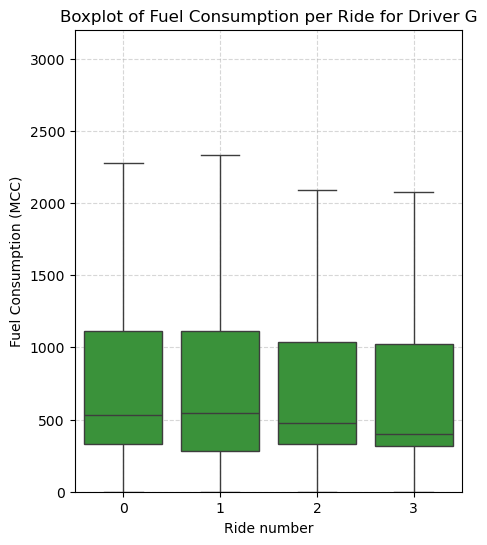

In [10]:
G_palette = [reversed_palette[7]]
df_D = df[df["Class"] == "G"]

# Create the box plot
plt.figure(figsize=(5, 6))
sns.boxplot(x="Ride number", y="Fuel_consumption", data=df_D, hue="Class", palette=G_palette, showfliers=False)

# Improve visualization
plt.xlabel("Ride number")
plt.ylabel("Fuel Consumption (MCC)")
plt.title("Boxplot of Fuel Consumption per Ride for Driver G")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend().remove()
plt.ylim(0,3200)

# Show the plot
plt.show()

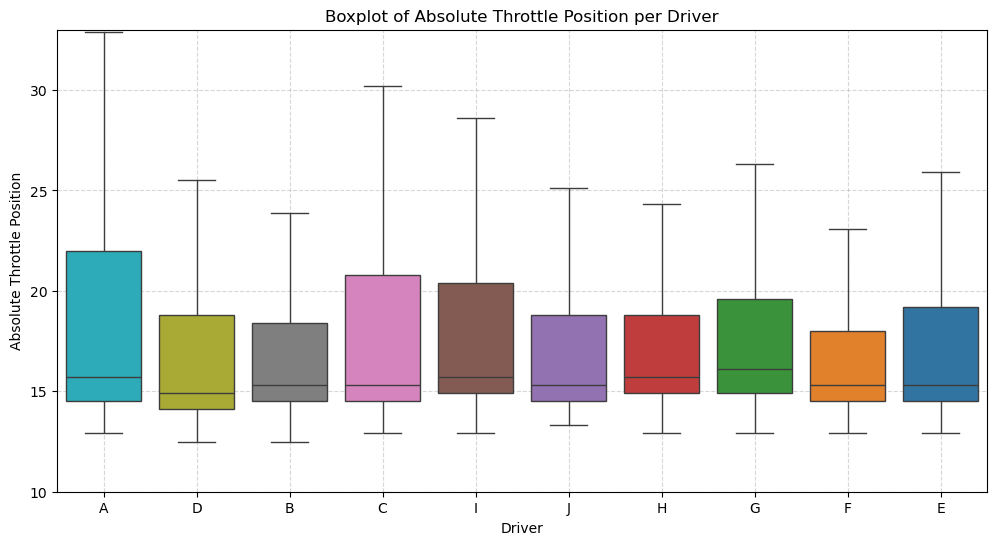

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Class", y="Absolute_throttle_position", data=df, hue="Class", palette=reversed_palette, showfliers=False, legend=False)

plt.xlabel("Driver")
plt.ylabel("Absolute Throttle Position")
plt.title("Boxplot of Absolute Throttle Position per Driver")
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(10,33)
plt.show()

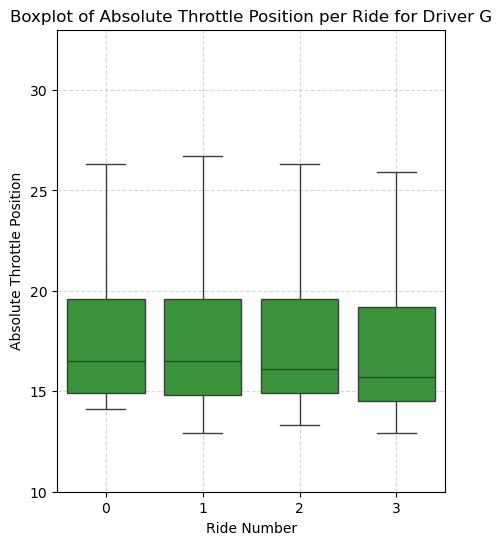

In [12]:
df_D = df[df["Class"] == "G"]

# Create the box plot
plt.figure(figsize=(5, 6))
sns.boxplot(x="Ride number", y="Absolute_throttle_position", data=df_D, hue="Class", palette=G_palette, showfliers=False)

# Improve visualization
plt.xlabel("Ride Number")
plt.ylabel("Absolute Throttle Position")
plt.title("Boxplot of Absolute Throttle Position per Ride for Driver G")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend().remove()
plt.ylim(10,33)

# Show the plot
plt.show()